In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
import seaborn as sns

<AxesSubplot: xlabel='Potability', ylabel='count'>

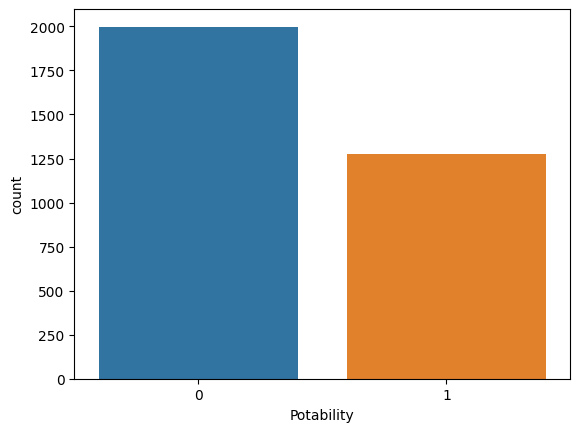

In [5]:
sns.countplot(x="Potability",data=df)

<AxesSubplot: ylabel='Frequency'>

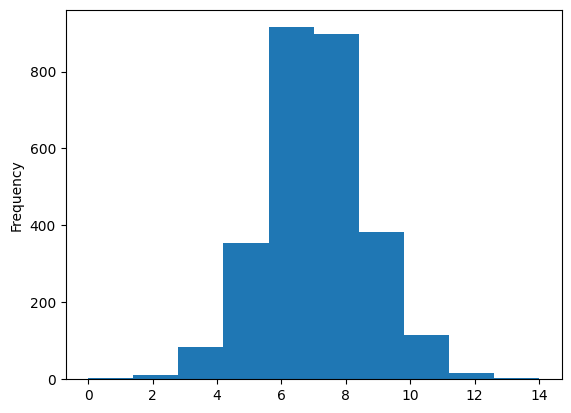

In [6]:
df["ph"].plot.hist()

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot: >

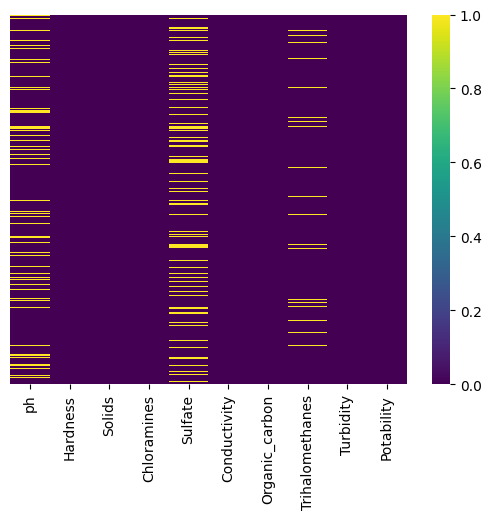

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [16]:
X=df.drop("Potability",axis=1)
y=df["Potability"]

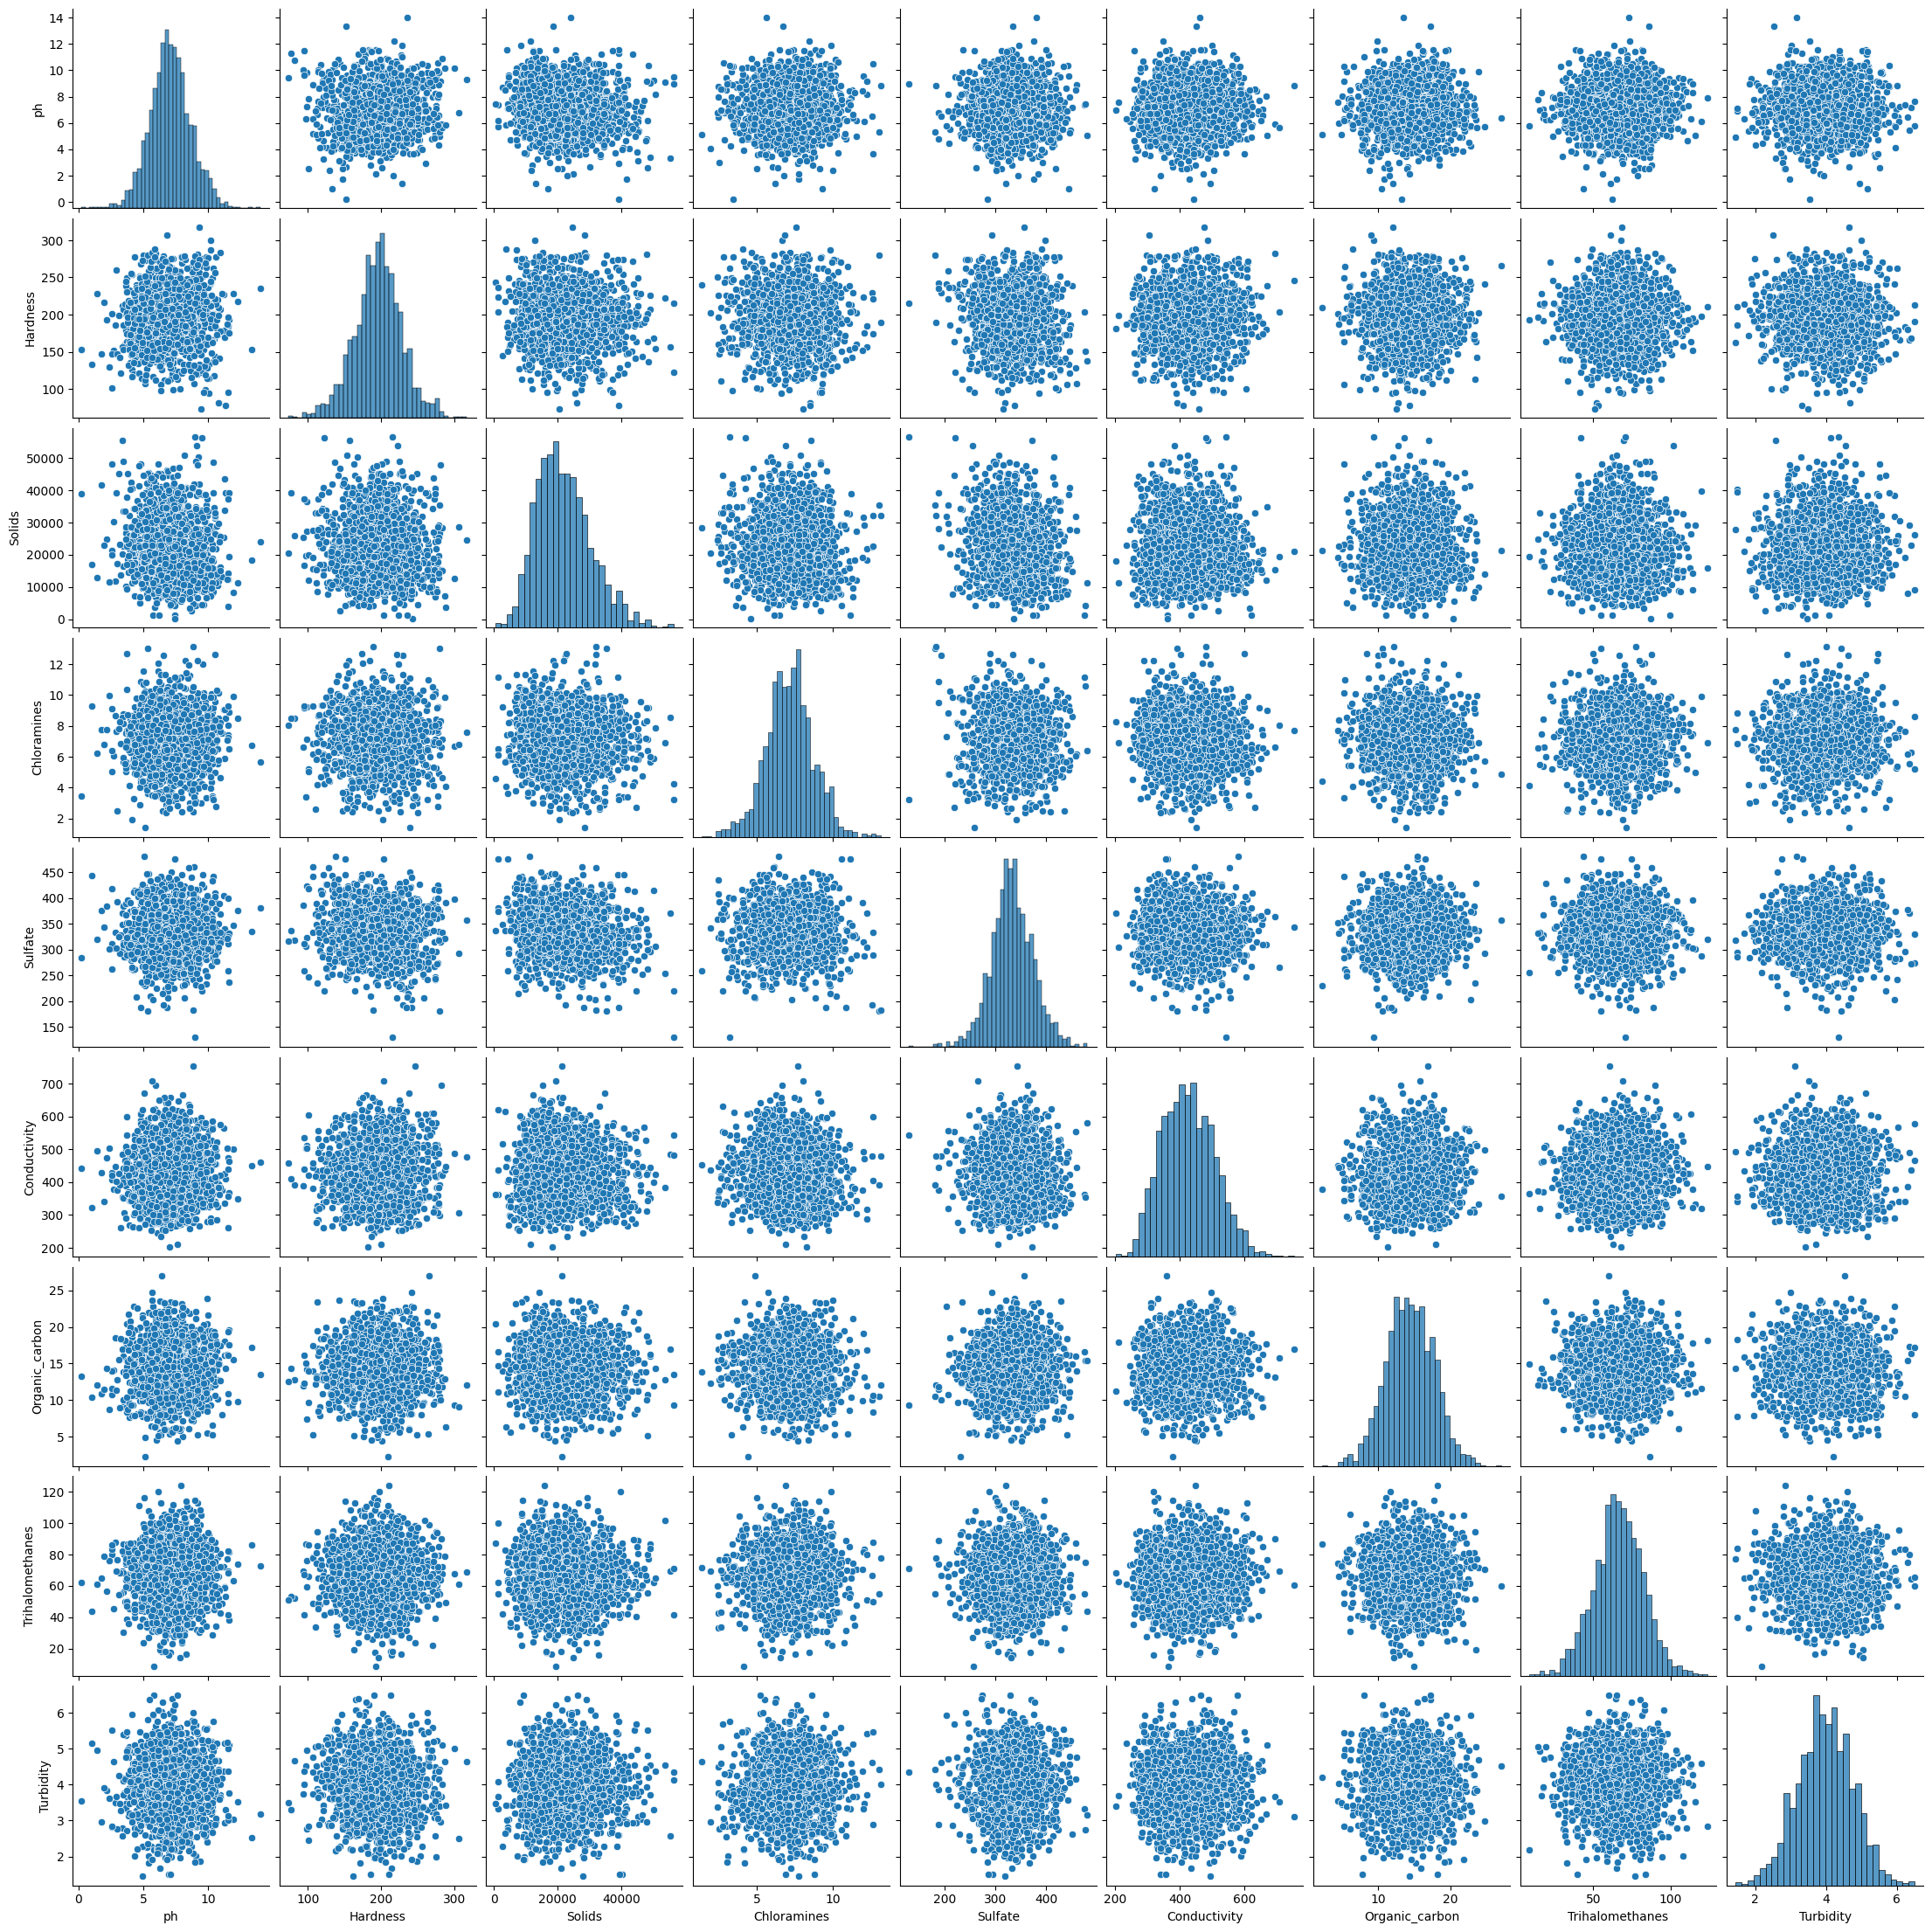

In [17]:
sns.pairplot(X)

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(1508, 9)
(503, 9)
(1508,)
(1508,)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model=LogisticRegression()

In [19]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [20]:
lg_model.score(X_test,y_test)

0.5904572564612326

In [21]:
lg_model.score(X_train,y_train)

0.6027851458885941

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
tahmin=lg_model.predict(X_test )

In [24]:
confusion_matrix(y_test,tahmin)

array([[295,   1],
       [205,   2]], dtype=int64)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model=GaussianNB()

In [27]:
nb_b=model.fit(X_train,y_train)

In [28]:
nb_b.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [29]:
tahmin=nb_b.predict(X_test)

In [30]:
confusion_matrix(y_test,tahmin)

array([[247,  49],
       [161,  46]], dtype=int64)

In [31]:
nb_b.predict_proba(X_test)[0:10]

array([[0.62139881, 0.37860119],
       [0.66457514, 0.33542486],
       [0.66584129, 0.33415871],
       [0.62475073, 0.37524927],
       [0.60769617, 0.39230383],
       [0.66899858, 0.33100142],
       [0.68496432, 0.31503568],
       [0.83359703, 0.16640297],
       [0.68080088, 0.31919912],
       [0.33498305, 0.66501695]])

In [32]:
y_pred=nb_b.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.5825049701789264

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier()

In [37]:
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [38]:
y_pred=knn_model.predict(X_test)

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
accuracy_score(y_test,y_pred)

0.5288270377733598

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Alper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

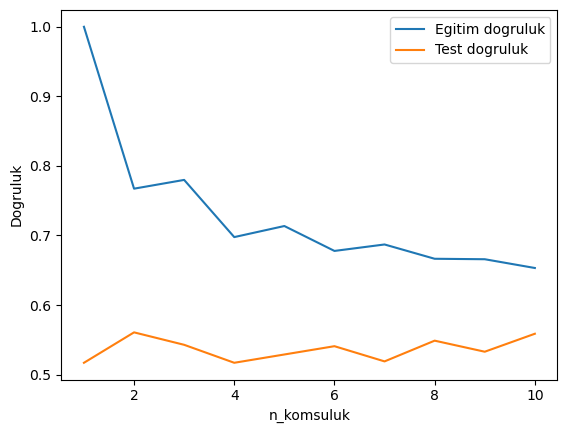

In [40]:
import matplotlib.pyplot as plt
train_dogruluk=[]
test_dogruluk=[]
komsuluk_sayisi=range(1,11)
for n_komsuluk in komsuluk_sayisi:
    snf=KNeighborsClassifier(n_neighbors=n_komsuluk)
    snf.fit(X_train,y_train)
    train_dogruluk.append(snf.score(X_train,y_train))
    test_dogruluk.append(snf.score(X_test,y_test))
plt.plot(komsuluk_sayisi,train_dogruluk,label="Egitim dogruluk")
plt.plot(komsuluk_sayisi,test_dogruluk,label="Test dogruluk")
plt.ylabel("Dogruluk")
plt.xlabel("n_komsuluk")
plt.legend()

In [41]:
reg=KNeighborsClassifier(n_neighbors=3)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5427435387673957

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.6123260437375746


In [44]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.6657824933687002
0.6222664015904572


In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans=KMeans(n_clusters=4)

In [48]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [49]:
labels = kmeans.predict(X)

In [50]:
labels

array([0, 0, 1, ..., 3, 1, 3])

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp=MLPClassifier(random_state=0).fit(X_train,y_train)

In [53]:
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.40384615384615385
0.4135188866799205


In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [55]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)
print(mlp.score(X_train_scaled,y_train))
print(mlp.score(X_test_scaled,y_test))

0.7685676392572944
0.679920477137177


C:\Users\Alper\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
import tensorflow as tf
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
y_train[:5,:]


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [57]:
X_train=X_train.values
X_test=X_test.values
X_train[0]

array([6.54802056e+00, 2.78585105e+02, 2.55083869e+04, 6.74937780e+00,
       3.66871502e+02, 4.97321753e+02, 1.65631665e+01, 7.93236784e+01,
       3.61186037e+00])

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()


In [59]:
model.add(Dense(64,activation="relu",input_shape=X_train[0].shape))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="sigmoid"))


In [60]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
             metrics=["acc"])


In [61]:
history=model.fit(X_train,y_train,batch_size=32,epochs=7,validation_split=0.1)


Epoch 1/7
43/43 [==============================] - 1s 10ms/step - loss: 13.5983 - acc: 0.5181 - val_loss: 3.3653 - val_acc: 0.3974
Epoch 2/7
43/43 [==============================] - 0s 4ms/step - loss: 2.7132 - acc: 0.5195 - val_loss: 1.2499 - val_acc: 0.3974
Epoch 3/7
43/43 [==============================] - 0s 4ms/step - loss: 2.3607 - acc: 0.5129 - val_loss: 1.9817 - val_acc: 0.6026
Epoch 4/7
43/43 [==============================] - 0s 4ms/step - loss: 1.1772 - acc: 0.5181 - val_loss: 1.4453 - val_acc: 0.6026
Epoch 5/7
43/43 [==============================] - 0s 4ms/step - loss: 0.8085 - acc: 0.5365 - val_loss: 0.7214 - val_acc: 0.6026
Epoch 6/7
43/43 [==============================] - 0s 4ms/step - loss: 1.2539 - acc: 0.5166 - val_loss: 1.8567 - val_acc: 0.6026
Epoch 7/7
43/43 [==============================] - 0s 4ms/step - loss: 0.8914 - acc: 0.5438 - val_loss: 0.7476 - val_acc: 0.6026


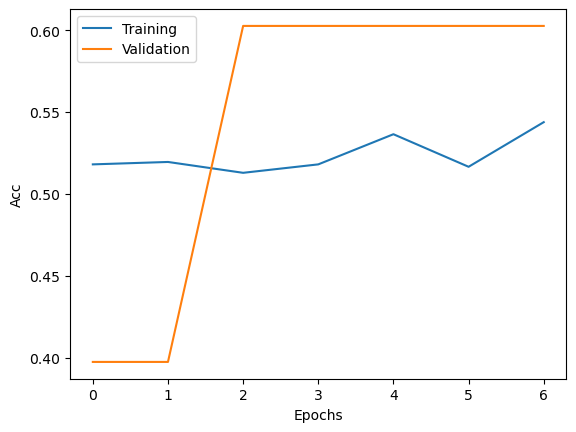

In [62]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

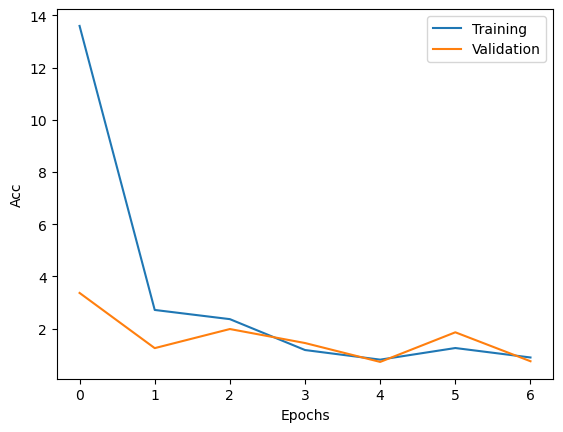

In [63]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])


In [64]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.7554 - acc: 0.5905


[0.7553867101669312, 0.5904572606086731]